In [1]:
include("radarsim.jl")
using .radarsim;

In [2]:
using Gadfly;
using DSP;
using FFTW;

In [3]:
samp_rate = 5e6  #hz
prf = 100 #Hz
duty_factor = .15; #.05
β = 1e6; #Pulse Bandwidth
repetitions = 128;
fc = 900_000_000; #Hz

Gt = 40; #dB
Gr = 45; #dB
system_loss = 6; #dB

targets = [Target(560_094, 0), Target(800_000, 0)]
num_targets = length(targets);

In [4]:
τ = duty_factor * (1/prf);

In [5]:
t, pulse = single_pulse(samp_rate, prf, τ, β, target_pow = 0, envelope_type="Rectangular", pulse_type="Increasing");
p = pulse #single_pulse(samp_rate, prf, τ, β, );
pulse_compression = conv(pulse, reverse(p[begin:round(Int, τ*samp_rate)]));
y1 = abs.(pulse_compression);

In [6]:
t, pulse = single_pulse(samp_rate, prf, τ, β, target_pow = 0, envelope_type="Gaussian", pulse_type="Increasing");
p = pulse #single_pulse(samp_rate, prf, τ, β, );
pulse_compression = conv(pulse, reverse(p[begin:round(Int, τ*samp_rate)]));
y2 = abs.(pulse_compression);

In [7]:
t, pulse = single_pulse(samp_rate, prf, τ, β, target_pow = 0, envelope_type="HalfSin", pulse_type="Increasing");
p = pulse #single_pulse(samp_rate, prf, τ, β, );
pulse_compression = conv(pulse, reverse(p[begin:round(Int, τ*samp_rate)]));
y3 = abs.(pulse_compression);

In [8]:
x1=1:length(y1)

1:57499

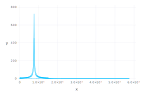

In [10]:
plot(layer(x=x1, y=y1,  , Geom.line),
layer(x=x1, y=y2, Geom.line),
layer(x=x1, y=y3, Geom.line))